In [1]:
# Imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from custom_pca import CustomPCA
from utils import read_text

In [2]:
# Constants

FILENAME = 'MI_timesteps.txt'
WINDOWS_FILENAME = 'windows.txt'
M = 10001 # number of windows

In [3]:
def read_data(file_name):
    """
    Reads coordinates of the density data
    :param file_name:    Input file storing coordinates of the density data
    :returns:            Density values in form of a DataFrame
    """
    data = pd.read_csv(file_name, sep=' ')
    return data

In [4]:
data = read_data(FILENAME)
data.head(5)

,timeStep,areaDensityCounting-PID5,areaDensityCounting-PID6,areaDensityCounting-PID7,areaDensityCounting-PID8,areaDensityCounting-PID9,areaDensityCounting-PID10,areaDensityCounting-PID11,areaDensityCounting-PID12,areaDensityCounting-PID13
0,1,36,0,0,0,0,0,0,0,0
1,2,36,0,0,0,0,0,0,0,0
2,3,43,0,0,0,0,0,0,0,0
3,4,49,0,0,0,0,0,0,0,0
4,5,59,0,0,0,0,0,0,0,0


In [5]:
def form_data():
    """
    Forms the data in a more readable, accessible format
    :returns: y is the data itself where y_delayed (containing first 3 cols) is the data to be used for operations
    """
    y1 = np.asarray(data['areaDensityCounting-PID5'])
    y2 = np.asarray(data['areaDensityCounting-PID6'])
    y3 = np.asarray(data['areaDensityCounting-PID7'])
    y4 = np.asarray(data['areaDensityCounting-PID8'])
    y5 = np.asarray(data['areaDensityCounting-PID9'])
    y6 = np.asarray(data['areaDensityCounting-PID10'])
    y7 = np.asarray(data['areaDensityCounting-PID11'])
    y8 = np.asarray(data['areaDensityCounting-PID12'])
    y9 = np.asarray(data['areaDensityCounting-PID13'])

    # generate y(x)
    y = [(y1[i], y2[i], y3[i], y4[i], y5[i], y6[i], y7[i], y8[i], y9[i]) for i in range(len(y1))]

    # generate data for delay embedding
    y_delayed = [(y1[i], y2[i], y3[i]) for i in range(len(y1))]
    
    return y, y_delayed

In [6]:
y, y_delayed = form_data()

#### Since it can be mapped locally to a one-dimensional Euclidean space (i.e. d=1), we need 2d+1=3 dimensions to embed it.

In [7]:
# We set n=3 as to represent dimensions
N = 3

## Generate windows

In [8]:
def flatten(xss):
    """
    Flatten values inside array
    :param xss:    Array to be flattened
    """
    return [x for xs in xss for x in xs]

def generate_windows():
    """
    Generates windows then writes the matrix to a file
    """
    windows = [list() for _ in range(M)]

    for row_ix in range(M):
        windows[row_ix] = flatten(y_delayed[row_ix:row_ix+351])


    np.savetxt(WINDOWS_FILENAME, windows, fmt='%i')

In [9]:
def run_pca(a):
    """
    Run dimension reduction algorithm PCA then embeds the data for N components
    :param a:  Matrix A containing data
    :returns:  Data representation(state) with lower(N) dimensions
    """
    pca = CustomPCA(a)
    total_importance = 0.0
    for i in range(N):
        imp = pca.get_importance_of_k(i)
        total_importance += imp
        print(f'component {i} has importance {imp}')
    print(f'Total importance of first {N} components is {total_importance}')
    
    
    # reconstruct first N components
    embedded_data = pca.reconstruct_first_k(N)
    
    return embedded_data

In [10]:
def simulate():
    generate_windows()
    A = read_text('windows.txt')
    embedded_data = run_pca(A)
    return embedded_data

In [11]:
embedded_data = simulate()

Diagonal matrix values: [1.32742809e+05 9.60333992e+04 7.62257187e+04 ... 1.39235582e+01
 1.37878974e+01 1.37649225e+01]
component 0 has importance 44.5696521735527
component 1 has importance 23.32715856898964
component 2 has importance 14.696715731742097
Total importance of first 3 components is 82.59352647428443


### Part 2

In [16]:
def draw_plot(embedded_data):
    for i in range(1, 10):
        plt.scatter(embedded_data[:, 0], embedded_data[:, i], s=1, c=data[data.columns[i]][:10001])

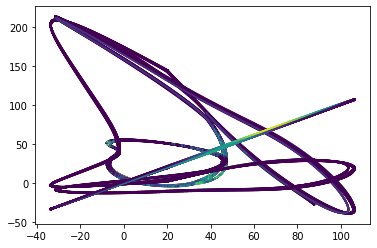

In [17]:
draw_plot(embedded_data)